# Copernicus example: Plot AVEARCHM netcdf files: section and spatial plots
time axis should add before use AVEARCHM merged data using cdo settaxis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import gsw.density as density

In [2]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

In [3]:
#df = xr.open_dataset('nioa_climatology_monthly_temp_salt_nio.nc')
#print(df)

path_in = "./"
out_path = "./"
print(path_in,out_path)

#file_ds = xr.open_dataset(path_in + 'global-analysis-forecast-phy-001-024-monthly_1643785075501.nc')
#file_ds = xr.open_dataset(path_in + 'temp_time_ave_taxis.nc',decode_times=False)
file_ds = xr.open_dataset(path_in + 'AVEARCHM_merged_taxis.nc',decode_times=False)
print(file_ds)

./ ./
<xarray.Dataset>
Dimensions:      (time: 9, longitude: 721, latitude: 481, depth: 12)
Coordinates:
  * time         (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0
  * longitude    (longitude) float32 20.0 20.12 20.25 ... 109.8 109.9 110.0
  * latitude     (latitude) float32 -30.0 -29.88 -29.75 ... 29.75 29.88 30.0
  * depth        (depth) float32 5.0 30.0 50.0 100.0 ... 2e+03 2.5e+03 3e+03
Data variables:
    model_depth  (latitude, longitude) float32 ...
    so           (time, depth, latitude, longitude) float32 ...
    thetao       (time, depth, latitude, longitude) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.5 (http://mpimet.mpg.d...
    history:        Fri Jan 28 12:16:35 2022: cdo settaxis,1992-01-15,00:00,1...
    source:         NERSC-HYCOM model fields
    institution:    NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    Conventions:    CF-1.4
    title:          Arctic Ocean Physics Reanalysis
    references:     http://topaz.

In [5]:
# Set the coordinate names (used later for accessing the data)
lon_name = "longitude"
lat_name = "latitude"
time_name = "time"
depth_name = "depth"
# Set the variable names
tem_name = "thetao"
# #sal_name = "so"
# mld_name = "mlotst"
# uo_name = "uo"
# vo_name = "vo"

print(file_ds)
#file_ds[tem_name]
#tem_name
#lon_name
print(file_ds[depth_name])

<xarray.Dataset>
Dimensions:      (time: 9, longitude: 721, latitude: 481, depth: 12)
Coordinates:
  * time         (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0
  * longitude    (longitude) float32 20.0 20.12 20.25 ... 109.8 109.9 110.0
  * latitude     (latitude) float32 -30.0 -29.88 -29.75 ... 29.75 29.88 30.0
  * depth        (depth) float32 5.0 30.0 50.0 100.0 ... 2e+03 2.5e+03 3e+03
Data variables:
    model_depth  (latitude, longitude) float32 ...
    so           (time, depth, latitude, longitude) float32 ...
    thetao       (time, depth, latitude, longitude) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.5 (http://mpimet.mpg.d...
    history:        Fri Jan 28 12:16:35 2022: cdo settaxis,1992-01-15,00:00,1...
    source:         NERSC-HYCOM model fields
    institution:    NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    Conventions:    CF-1.4
    title:          Arctic Ocean Physics Reanalysis
    references:     http://topaz.nersc.

In [6]:
# --- Choose the variable to plot (but comment the others with the symbol #): ---
var_sel = file_ds[tem_name]

#var_sel = file_ds[j][sal_name]
#var_sel = file_ds[j][mld_name]
#var_sel = file_ds[j][uo_name]
#var_sel = file_ds[j][vo_name]

dataset_3D = False 
if depth_name in var_sel.coords:
    dataset_3D = True
    print(dataset_3D)
    
# --- Set up the arrays of coordinates for the selected dataset ---
# 
lats = var_sel[lat_name]
lons = var_sel[lon_name]
times = var_sel[time_name]
depths = var_sel[depth_name] if dataset_3D else []

# lats = file_ds[lat_name]
# lons = file_ds[lon_name]
# depths = file_ds[depth_name]
print(depths)

True
<xarray.DataArray 'depth' (depth: 12)>
array([   5.,   30.,   50.,  100.,  200.,  400.,  700., 1000., 1500., 2000.,
       2500., 3000.], dtype=float32)
Coordinates:
  * depth    (depth) float32 5.0 30.0 50.0 100.0 ... 1.5e+03 2e+03 2.5e+03 3e+03
Attributes:
    standard_name:  depth
    long_name:      depth
    units:          m
    positive:       down
    axis:           Z


###### Set the variable's min and max values for the plot and the colorbar (otherwise assign None):

In [7]:
# Set lat-lon limits - FULL AREA
lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

# # Set lat-lon limits - CUSTOM AREA
# lon_min = 110
# lon_max = 140
# lat_min = 10
# lat_max = 40

In [8]:
# For automatic colobar limits
min_value, max_value = None, None 


In [9]:
# Set the desired depth (in meters, NOT LEVELS)
d = 0

#### Plot configuration

In [10]:
# Plot configuration
width_inch = 16
height_inch = 8

# Map configuration
map_config = { 
#     "projection": "merc",
    "llcrnrlat": lat_min,
    "llcrnrlon": lon_min,
    "urcrnrlat": lat_max,
    "urcrnrlon": lon_max,
    "resolution": 'i',
    "epsg": 4326
}

# Axes labels
fontsize = 14
xlabel = 'longitude [deg]'
ylabel = 'latitude [deg]'
xlabelpad = 30
ylabelpad = 60

# Colorbar configuration
cmap = "viridis"
# color-blindness friendly: viridis, cividis
# NOT color-blindness friendly: plasma, inferno, magma, jet
cbar_position = "right"

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}

label_fontstyle = {
    "fontsize": "12",
    "labelpad": 30
}

#### Map generation

<xarray.DataArray 'thetao' (latitude: 481, longitude: 721)>
[346801 values with dtype=float32]
Coordinates:
    time       float64 0.0
  * longitude  (longitude) float32 20.0 20.12 20.25 20.38 ... 109.8 109.9 110.0
  * latitude   (latitude) float32 -30.0 -29.88 -29.75 ... 29.75 29.88 30.0
    depth      float32 5.0
Attributes:
    standard_name:  sea_water_potential_temperature
    units:          degrees_C
    cell_methods:   area: mean
1992
<class 'numpy.ndarray'>
sea_water_potential_temperature
sea_water_potential_temperature 1992 5.00[m]


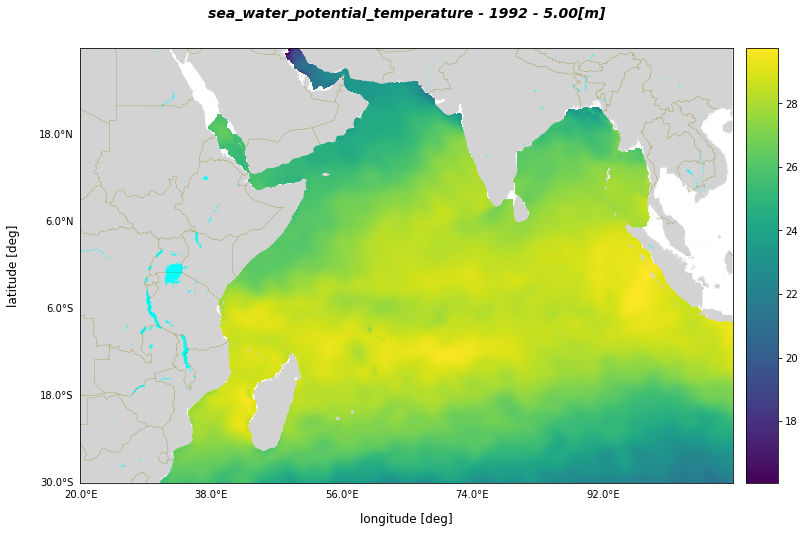

In [13]:
# Set the coordinates indexes
lat_indexes = getRangeIndexes(lats, lat_min, lat_max)
lon_indexes = getRangeIndexes(lons, lon_min, lon_max)
time_indexes = [0]

# Get the selected coordinates:
lats_sel = lats[lat_indexes]
lons_sel = lons[lon_indexes]

for t in time_indexes:
 
    if dataset_3D:
        data = var_sel[t, :, lat_indexes, lon_indexes].sel(depth=d,method='nearest')
    else: 
        data = var_sel[t, lat_indexes, lon_indexes]

    plt.figure(figsize=(width_inch, height_inch))
    print(data)
    
    map = Basemap(**map_config)

    ## contour fill
    min_value = data.min() if min_value is None else min_value
    max_value = data.max() if max_value is None else max_value
    step_value = 0.5
    contour_levels = np.arange(min_value, max_value, step_value)
    # map.contourf(xx, yy, data, contour_levels, cmap=cmap)

    
    ## pcolormesh
    x = np.linspace(0, map.urcrnrx, data.shape[1])
    y = np.linspace(0, map.urcrnry, data.shape[0])
    
    xx, yy = np.meshgrid(lons_sel, lats_sel)
    
#     colormesh = map.pcolormesh(xx, yy, data, cmap=cmap)
    colormesh = map.pcolormesh(xx, yy, data, vmin=min_value, vmax=max_value, cmap=cmap)
    
    ## draw meridians and parallels
    step_lat = float((lat_max - lat_min) / 5)
    step_lon = float((lon_max - lon_min) / 5)

    parallels = np.arange(lat_min, lat_max, step_lat)
    meridians = np.arange(lon_min, lon_max, step_lon) 

    map.drawmeridians(meridians, labels=[0,0,0,1], fmt="%2.1f", linewidth=0.0)
    map.drawparallels(parallels, labels=[1,0,0,0], fmt="%2.1f", linewidth=0.0)

    ## draw colorbar
    map.colorbar(colormesh, cbar_position)

    ## draw countries...
    map.drawcountries(linewidth=0.25, color='olive')
    map.fillcontinents(color='lightgray',lake_color='aqua')

    title_sel = data.standard_name
    #title_sel = data.long_name
    #print(title_sel)
    
    timestep = np.array(np.datetime64('1992'))
    print(timestep)
    print(type(timestep))
    
    #var_str = "{} [{}]".format(title_sel, data.units)
    #var_str = "{} [{}]".format(title_sel,"")#, data.units)
    var_str = "{}".format(title_sel,"")
    print(var_str)
    
    if dataset_3D:
        depth_str = "{:.2f}{}".format(float(data[depth_name]), "[m]")
        timestep_str = str(timestep)
        title = ' - '.join((var_str, timestep_str, depth_str))
    else:
        title = ' - '.join(str(var_str, timestep))
    print(var_str, timestep_str, depth_str)
        
    plt.title(title, **title_fontstyle)
    plt.xlabel(xlabel, labelpad=xlabelpad, fontsize=12)
    plt.ylabel(ylabel, labelpad=ylabelpad, fontsize=12)    
    
#     # output file
    output_file = os.path.join(out_path,title.replace(' ','_')) + ".jpg"

#     # save the output file
    plt.savefig(output_file,bbox_inches='tight',dpi=300)

    plt.show()

    plt.close()

# Transect plot

In [14]:
depth_min = 0
depth_max = 5000 
lat_point = 18
lon_min = 50
lon_max = 74

In [16]:
depth_indexes = getRangeIndexes(file_ds.depth, depth_min, depth_max)
lat_indexes = np.abs(lats-lat_point).argmin()
lon_indexes = getRangeIndexes(lons, lon_min, lon_max)
time_indexes = 0

In [17]:
# index for the ds arrays
#ds = file_ds

lons_sel = file_ds[lon_name][lon_indexes]
lats_sel = file_ds[lat_name][lat_indexes]
depths_sel = -file_ds[depth_name][depth_indexes] # note the minus '-ds'. Why?
depths_sel

<xarray.DataArray 'depth' (depth: 12)>
array([   -5.,   -30.,   -50.,  -100.,  -200.,  -400.,  -700., -1000.,
       -1500., -2000., -2500., -3000.], dtype=float32)
Coordinates:
  * depth    (depth) float32 5.0 30.0 50.0 100.0 ... 1.5e+03 2e+03 2.5e+03 3e+03
Attributes:
    standard_name:  depth
    long_name:      depth
    units:          m
    positive:       down
    axis:           Z

In [18]:
# data = file_ds[tem_name]
# cord = [time_indexes, depth_indexes, lat_indexes, lon_indexes]
#TEM = [data,cord]

TEM = [file_ds[tem_name][time_indexes, depth_indexes, lat_indexes, lon_indexes]]
#TEM = [file_ds[tem_name][time_indexes, depth_indexes, lat_indexes, lon_indexes]]
# SAL = [ds[sal_name][time_indexes, depth_indexes, lat_indexes, lon_indexes]]
# MLD = [ds[mld_name][time_indexes, lat_indexes, lon_indexes]]
# UO = [ds[uo_name][time_indexes, depth_indexes, lat_indexes, lon_indexes]]

##file_ds[tem_name]
##time_indexes
#lon_indexes
TEM

[<xarray.DataArray 'thetao' (depth: 12, longitude: 193)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
     time       float64 0.0
   * longitude  (longitude) float32 50.0 50.12 50.25 50.38 ... 73.75 73.88 74.0
     latitude   float32 18.0
   * depth      (depth) float32 5.0 30.0 50.0 100.0 ... 2e+03 2.5e+03 3e+03
 Attributes:
     standard_name:  sea_water_potential_temperature
     units:          degrees_C
     cell_methods:   area: mean]

##### Set the parameters for the plot

In [19]:
# Plot configuration
width_inch = 14
height_inch = 8

# Axes labels
fontsize = 14
xlabel = "longitude [degN]"
ylabel = "depth [m]"

# Colorbar configuration
cmap = "viridis"
# color-blindness friendly: viridis, cividis
# NOT color-blindness friendly: plasma, inferno, magma, jet
cbar_position = "right"

contour_levels = 100

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}
label_fontstyle = {
    "fontsize": "12",
#     "labelpad": 10
}

print(xlabel)

longitude [degN]


# Function for plotting the transect

In [20]:
# arguments:
# - data: data to plot - 2 dim array
# - minmaxvalues: [{ "min": None, "max": None},{ "min": None, "max": None}]
# - step_value: step in levels. If is 0, then levels = 100
# - title
# - lats_sel
# - depths_sel
#
def plot_transect(data_plot, minmaxvalues, step_value, title, lons_sel, depths_sel):
    title_sel = title['name']
    title_uni = title['units']
    
    fig = plt.figure(figsize=(width_inch, height_inch))
    #fig = plt.figure()
    
    # Create the meshgrid for the plot 
    xx, yy = np.meshgrid(lons_sel, depths_sel)
    
    ### --- PLOT 1 ---###
    fig.add_subplot(1, 2, 1)
    idx = 0
    data = data_plot[idx]
    min_value = minmaxvalues[idx]['min']
    max_value = minmaxvalues[idx]['max']
  
    # set variable limits
    min_value = data.min() if min_value is None else min_value
    max_value = data.max() if max_value is None else max_value
   
    contour_levels = np.arange(min_value, max_value, step_value)  if step_value > 0 else 100
    
    ## contour fill
    plt.contourf(xx, yy, data, contour_levels, cmap=cmap, vmin=min_value, vmax=max_value)
    
    
    plt.grid(False)
#     plt.colorbar(colormesh,extend='both')
#    plt.colorbar(extend='both')
    plt.colorbar()
    plt.axis([50, 74, -3500, -0])
    
    # Get the timestep
    #timestep = np.datetime_as_string(data.time,'h')
    timestep = np.array(np.datetime64('1992'))
    timestep_str = str(timestep)
    
    #var_str = "{} [{}]".format(title_sel, data.units)
    var_str = "{}".format(title_sel,"")#, data.units)
    #var_str = "{} [{}]".format(title_sel,"") 
    title = '-'.join((var_str, timestep_str))
    print(var_str, timestep_str)
    
    plt.title(title, **title_fontstyle)
    plt.xlabel(xlabel, **label_fontstyle)
    plt.ylabel(ylabel, **label_fontstyle)
    
    
#     ### --- PLOT 2 ---###
#     fig.add_subplot(1, 2, 2)
#     idx = 1
#     data = data_plot[idx]
#     min_value = minmaxvalues[idx]['min']
#     max_values = minmaxvalues[idx]['max']
    
#     # set variable limits
#     min_value = data.min() if min_value is None else min_value
#     max_value = data.max() if max_value is None else max_value
    
#     contour_levels = np.arange(min_value, max_value, step_value)  if step_value > 0 else 100
    
#     ## contour fill
#     plt.contourf(xx, yy, data, contour_levels, cmap=cmap, vmin=min_value, vmax=max_value)
    
#     plt.grid()
# #     plt.colorbar(colormesh,extend='both')
# #    plt.colorbar(extend='both')
#     plt.colorbar()
        
#     # Get the timestep
#     timestep = np.datetime_as_string(data.time,'h')
#     var_str = "{} [{}]".format(title_sel, title_uni)
#     title = ' - '.join((var_str, timestep))

#     plt.title(title, **title_fontstyle)
#     plt.xlabel(xlabel, **label_fontstyle)
#     plt.ylabel(ylabel, **label_fontstyle)

    # output file
    output_file = os.path.join(out_path,title.replace(' ','_')) + ".jpg"

    # save the output file
    plt.savefig(output_file,bbox_inches='tight',dpi=300)

    plt.show()

    plt.close()

In [21]:
print(title)

sea_water_potential_temperature - 1992 - 5.00[m]


## plot temperature vertical cross-section using the above function

Temperature 1992


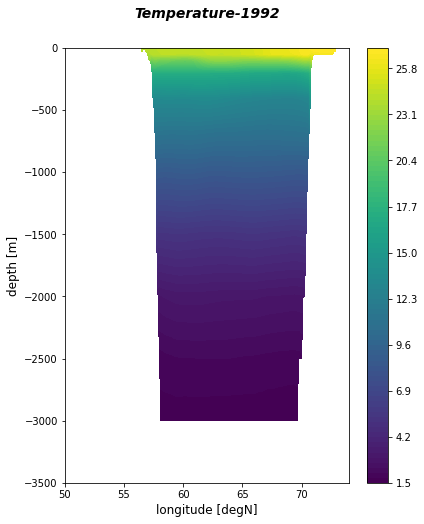

In [22]:
data = TEM

title = {"name":"Temperature","units":"degC"}

# plot the transect
# plot_transect(data, [{ "min": None, "max": None},{ "min": None, "max": None}],0, title, lons_sel, depths_sel)
plot_transect(data, [{ "min": None, "max": None}],0, title, lons_sel, depths_sel)


# The orginal matlab code